In [1]:
import pandas as pd

import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model, preprocessing, svm
from sklearn.preprocessing import StandardScaler, Normalizer
import math
import scipy
import random
import matplotlib
import seaborn as sns

%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
def category_values(dataframe, categories):
    for c in categories:
        print('\n', dataframe.groupby(by=c)[c].count().sort_values(ascending=False))
        print('Nulls: ', dataframe[c].isnull().sum())

def plot_correlation_map( df ):
    corr = df.corr()
    _ , ax = plt.subplots( figsize =( 12 , 10 ) )
    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )
    _ = sns.heatmap(
        corr, 
        cmap = cmap,
        square=True, 
        cbar_kws={ 'shrink' : .9 }, 
        ax=ax, 
        annot = True, 
        annot_kws = { 'fontsize' : 12 }
    )

In [3]:
df = pd.read_csv('autos.csv', sep=',', header=0, encoding='cp1252')
#df = pd.read_csv('autos.csv.gz', sep=',', header=0, compression='gzip',encoding='cp1252')
df.sample(10)

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
7187,2016-03-28 22:36:58,Opel_Zafira!_Gut_Gepflegt!,privat,Angebot,1999,control,bus,2002,manuell,101,zafira,150000,12,diesel,opel,NaN,2016-03-28 00:00:00,0,83512,2016-03-29 06:42:32
280973,2016-03-13 02:56:51,Volvo_V60_D5_Summum__Geartronic__Vollaustattun...,privat,Angebot,18590,control,kombi,2010,automatik,205,v60,90000,10,diesel,volvo,nein,2016-03-13 00:00:00,0,82327,2016-03-25 12:48:51
31566,2016-03-17 16:37:28,Opel_Corsa_5_Tueren,privat,Angebot,1650,test,kleinwagen,2001,manuell,0,corsa,150000,0,NaN,opel,nein,2016-03-17 00:00:00,0,65474,2016-04-06 12:45:54
222613,2016-03-12 19:46:52,Mercedes_Benz_CL_180,privat,Angebot,2950,test,coupe,2001,manuell,129,andere,150000,5,benzin,mercedes_benz,nein,2016-03-12 00:00:00,0,77886,2016-04-05 11:51:10
314030,2016-03-22 14:53:23,Ford_Mondeo_Turnier_16V_CLX,privat,Angebot,1000,control,kombi,1997,automatik,116,mondeo,150000,12,benzin,ford,nein,2016-03-22 00:00:00,0,24972,2016-04-06 04:16:59
333592,2016-03-17 20:47:16,Mini_Innocenti_850_Verkauf_oder_Tausch,privat,Angebot,6666,control,NaN,2017,manuell,43,NaN,60000,10,benzin,mini,NaN,2016-03-17 00:00:00,0,12621,2016-04-07 09:45:38
150887,2016-04-04 13:53:55,Fiat_Panda_Checkheftgepflegt_8Fach_Bereift,privat,Angebot,3777,control,kleinwagen,2008,manuell,60,panda,60000,11,benzin,fiat,nein,2016-04-04 00:00:00,0,59755,2016-04-06 15:16:42
338771,2016-03-24 18:58:24,Audi_A3_1.8TFSI_S_Line,privat,Angebot,22800,test,andere,2012,automatik,180,a3,60000,10,benzin,audi,nein,2016-03-24 00:00:00,0,74076,2016-04-07 14:58:12
256257,2016-04-03 11:58:55,Volkswagen_Polo_1.2_Comfortline,privat,Angebot,6950,control,kleinwagen,2009,manuell,69,polo,70000,8,benzin,volkswagen,nein,2016-04-03 00:00:00,0,22089,2016-04-07 13:16:58
190388,2016-03-17 19:41:33,Dacia_Logan_MCV_1.5_dCi,privat,Angebot,4800,control,kombi,2012,manuell,88,logan,150000,4,diesel,dacia,nein,2016-03-17 00:00:00,0,82110,2016-04-03 06:46:00


In [4]:
df.describe()

,price,yearOfRegistration,powerPS,kilometer,monthOfRegistration,nrOfPictures,postalCode
count,3.715280e+05,371528.000000,371528.000000,371528.000000,371528.000000,371528.0,371528.00000
mean,1.729514e+04,2004.577997,115.549477,125618.688228,5.734445,0.0,50820.66764
std,3.587954e+06,92.866598,192.139578,40112.337051,3.712412,0.0,25799.08247
min,0.000000e+00,1000.000000,0.000000,5000.000000,0.000000,0.0,1067.00000
25%,1.150000e+03,1999.000000,70.000000,125000.000000,3.000000,0.0,30459.00000
50%,2.950000e+03,2003.000000,105.000000,150000.000000,6.000000,0.0,49610.00000
75%,7.200000e+03,2008.000000,150.000000,150000.000000,9.000000,0.0,71546.00000
max,2.147484e+09,9999.000000,20000.000000,150000.000000,12.000000,0.0,99998.00000


In [5]:
print(df.seller.unique())
print(df.offerType.unique())
print(df.abtest.unique())
print(df.nrOfPictures.unique())

['privat' 'gewerblich']
['Angebot' 'Gesuch']
['test' 'control']
[0]


In [6]:
df.drop(['seller', 'offerType', 'abtest', 'dateCrawled', 'nrOfPictures', 'lastSeen', 'postalCode', 'dateCreated'], axis='columns', inplace=True)

In [7]:
print("Too new: %d" % df.loc[df.yearOfRegistration >= 2017].count()['name'])
print("Too old: %d" % df.loc[df.yearOfRegistration < 1950].count()['name'])
print("Too cheap: %d" % df.loc[df.price < 100].count()['name'])
print("Too expensive: " , df.loc[df.price > 150000].count()['name'])
print("Too few km: " , df.loc[df.kilometer < 5000].count()['name'])
print("Too many km: " , df.loc[df.kilometer > 200000].count()['name'])
print("Too few PS: " , df.loc[df.powerPS < 10].count()['name'])
print("Too many PS: " , df.loc[df.powerPS > 500].count()['name'])
print("Fuel types: " , df['fuelType'].unique())
#print("Offer types: " , df['offerType'].unique())
#print("Sellers: " , df['seller'].unique())
print("Damages: " , df['notRepairedDamage'].unique())
#print("Pics: " , df['nrOfPictures'].unique()) # nrOfPictures : number of pictures in the ad (unfortunately this field contains everywhere a 0 and is thus useless (bug in crawler!) )
#print("Postale codes: " , df['postalCode'].unique())
print("Vehicle types: " , df['vehicleType'].unique())
print("Brands: " , df['brand'].unique())

# Cleaning data
#valid_models = df.dropna()

#### Removing the duplicates
dedups = df.drop_duplicates(['name','price','vehicleType','yearOfRegistration'
                         ,'gearbox','powerPS','model','kilometer','monthOfRegistration','fuelType'
                         ,'notRepairedDamage'])

#### Removing the outliers
dedups = dedups[
        (dedups.yearOfRegistration <= 2016) 
      & (dedups.yearOfRegistration >= 1950) 
      & (dedups.price >= 100) 
      & (dedups.price <= 150000) 
      & (dedups.powerPS >= 10) 
      & (dedups.powerPS <= 500)]

print("-----------------\nData kept for analisys: %d percent of the entire set\n-----------------" % (100 * dedups['name'].count() / df['name'].count()))

Too new: 14680
Too old: 289
Too cheap: 13320
Too expensive:  232
Too few km:  0
Too many km:  0
Too few PS:  41040
Too many PS:  835
Fuel types:  ['benzin' 'diesel' nan 'lpg' 'andere' 'hybrid' 'cng' 'elektro']
Damages:  [nan 'ja' 'nein']
Vehicle types:  [nan 'coupe' 'suv' 'kleinwagen' 'limousine' 'cabrio' 'bus' 'kombi'
 'andere']
Brands:  ['volkswagen' 'audi' 'jeep' 'skoda' 'bmw' 'peugeot' 'ford' 'mazda'
 'nissan' 'renault' 'mercedes_benz' 'opel' 'seat' 'citroen' 'honda' 'fiat'
 'mini' 'smart' 'hyundai' 'sonstige_autos' 'alfa_romeo' 'subaru' 'volvo'
 'mitsubishi' 'kia' 'suzuki' 'lancia' 'porsche' 'toyota' 'chevrolet'
 'dacia' 'daihatsu' 'trabant' 'saab' 'chrysler' 'jaguar' 'daewoo' 'rover'
 'land_rover' 'lada']
-----------------
Data kept for analisys: 81 percent of the entire set
-----------------


In [8]:
dedups.isnull().sum()

name                       0
price                      0
vehicleType            10818
yearOfRegistration         0
gearbox                 5260
powerPS                    0
model                  11347
kilometer                  0
monthOfRegistration        0
fuelType               15400
brand                      0
notRepairedDamage      42124
dtype: int64

In [9]:
dedups['notRepairedDamage'].fillna(value='not-declared', inplace=True)
dedups['fuelType'].fillna(value='not-declared', inplace=True)
dedups['gearbox'].fillna(value='not-declared', inplace=True)
dedups['vehicleType'].fillna(value='not-declared', inplace=True)
dedups['model'].fillna(value='not-declared', inplace=True)

In [10]:
dedups.isnull().sum()

name                   0
price                  0
vehicleType            0
yearOfRegistration     0
gearbox                0
powerPS                0
model                  0
kilometer              0
monthOfRegistration    0
fuelType               0
brand                  0
notRepairedDamage      0
dtype: int64

gearbox
manuell         231997
automatik        66876
not-declared      5260
Name: gearbox, dtype: int64


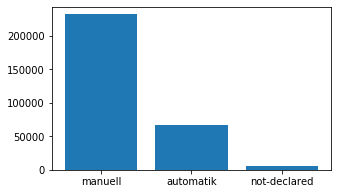

model
golf            24846
andere          21733
3er             17704
not-declared    11347
polo            10477
Name: model, dtype: int64


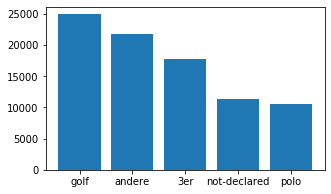

brand
volkswagen       64853
bmw              34441
opel             31757
mercedes_benz    29562
audi             27984
Name: brand, dtype: int64


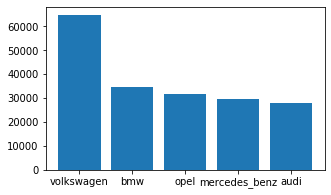

vehicleType
limousine     84843
kleinwagen    68415
kombi         59863
bus           26986
cabrio        20921
Name: vehicleType, dtype: int64


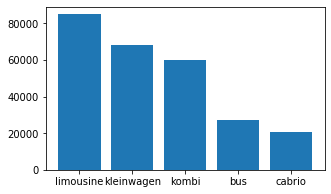

fuelType
benzin          189919
diesel           93299
not-declared     15400
lpg               4646
cng                474
Name: fuelType, dtype: int64


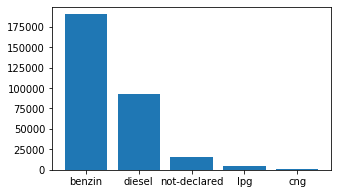

notRepairedDamage
nein            233684
not-declared     42124
ja               28325
Name: notRepairedDamage, dtype: int64


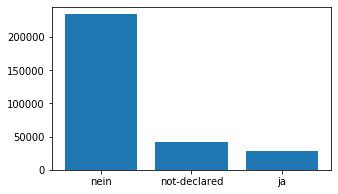

In [11]:
categories = ['gearbox', 'model', 'brand', 'vehicleType', 'fuelType', 'notRepairedDamage']

for i, c in enumerate(categories):
    v = dedups[c].unique()
    
    g = dedups.groupby(by=c)[c].count().sort_values(ascending=False)
    r = range(min(len(v), 5))

    print( g.head())
    plt.figure(figsize=(5,3))
    plt.bar(r, g.head()) 
    #plt.xticks(r, v)
    plt.xticks(r, g.index)
    plt.show()

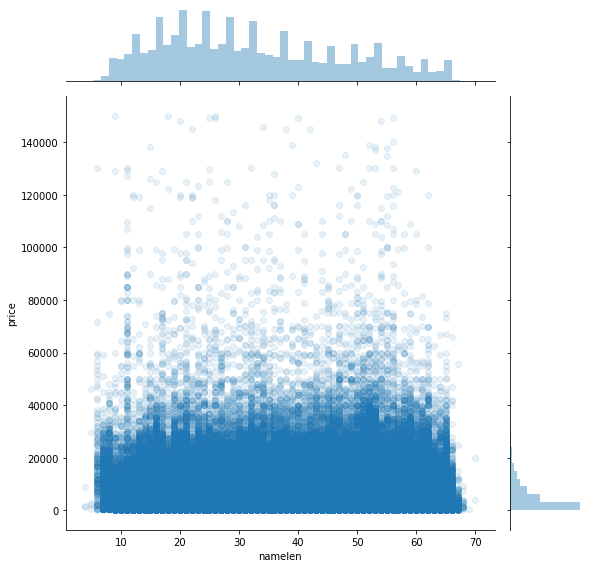

In [12]:
dedups['namelen'] = [min(70, len(n)) for n in dedups['name']]

ax = sns.jointplot(x='namelen', 
                   y='price',
                   data=dedups[['namelen','price']], 
                 #data=dedups[['namelen','price']][dedups['model']=='golf'], 
                    alpha=0.1, 
                    size=8)

In [13]:
labels = ['name', 'gearbox', 'notRepairedDamage', 'model', 'brand', 'fuelType', 'vehicleType']
les = {}

for l in labels:
    les[l] = preprocessing.LabelEncoder()
    les[l].fit(dedups[l])
    tr = les[l].transform(dedups[l]) 
    dedups.loc[:, l + '_feat'] = pd.Series(tr, index=dedups.index)

labeled = dedups[ ['price'
                        ,'yearOfRegistration'
                        ,'powerPS'
                        ,'kilometer'
                        ,'monthOfRegistration'
                        , 'namelen'] 
                    + [x+"_feat" for x in labels]]

In [14]:
len(labeled['name_feat'].unique()) / len(labeled['name_feat'])



0.6224184813880769

In [15]:
labeled.drop(['name_feat'], axis='columns', inplace=True)

,price,yearOfRegistration,powerPS,kilometer,monthOfRegistration,namelen,gearbox_feat,notRepairedDamage_feat,model_feat,brand_feat,fuelType_feat,vehicleType_feat
price,1.000000,0.385264,0.573037,-0.444440,0.044782,0.186254,-0.297746,-0.002440,-0.012514,-0.105694,0.055978,-0.010906
yearOfRegistration,0.385264,1.000000,0.186486,-0.333933,0.044390,0.158798,-0.094694,-0.015699,0.041173,-0.044526,0.142402,0.058958
powerPS,0.573037,0.186486,1.000000,-0.014727,0.038635,0.106243,-0.447440,-0.022761,-0.132902,-0.310254,0.086305,0.112243
kilometer,-0.444440,-0.333933,-0.014727,1.000000,-0.016177,-0.105892,0.035524,0.005072,-0.023827,-0.026645,0.115204,0.043183
monthOfRegistration,0.044782,0.044390,0.038635,-0.016177,1.000000,0.044338,-0.049902,-0.050227,-0.009070,-0.012156,-0.035938,-0.004369
namelen,0.186254,0.158798,0.106243,-0.105892,0.044338,1.000000,-0.150795,-0.008167,0.078520,0.100056,0.043864,-0.026672
gearbox_feat,-0.297746,-0.094694,-0.447440,0.035524,-0.049902,-0.150795,1.000000,0.038948,0.046971,0.125735,-0.057441,-0.092224
notRepairedDamage_feat,-0.002440,-0.015699,-0.022761,0.005072,-0.050227,-0.008167,0.038948,1.000000,0.017825,0.016474,0.061819,0.027220
model_feat,-0.012514,0.041173,-0.132902,-0.023827,-0.009070,0.078520,0.046971,0.017825,1.000000,0.472098,0.049058,-0.136196
brand_feat,-0.105694,-0.044526,-0.310254,-0.026645,-0.012156,0.100056,0.125735,0.016474,0.472098,1.000000,-0.023840,-0.102601


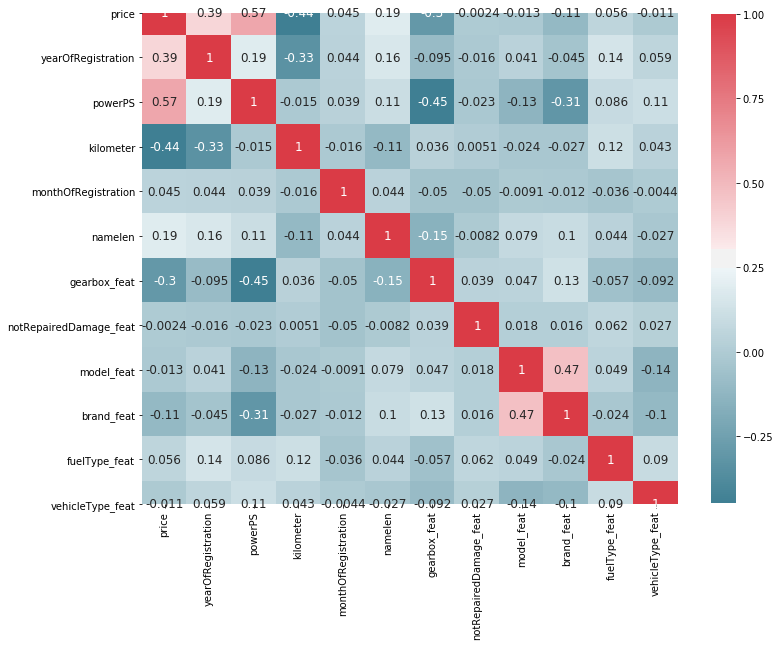

In [16]:
plot_correlation_map(labeled)
labeled.corr()



In [17]:
labeled.corr().loc[:,'price'].abs().sort_values(ascending=False)[1:]

powerPS                   0.573037
kilometer                 0.444440
yearOfRegistration        0.385264
gearbox_feat              0.297746
namelen                   0.186254
brand_feat                0.105694
fuelType_feat             0.055978
monthOfRegistration       0.044782
model_feat                0.012514
vehicleType_feat          0.010906
notRepairedDamage_feat    0.002440
Name: price, dtype: float64

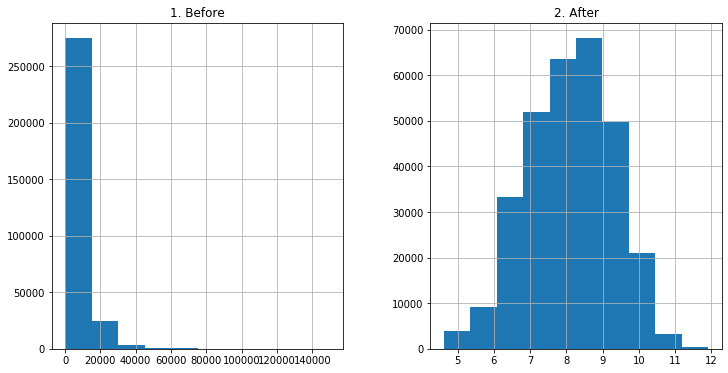

In [18]:
Y = labeled['price']
X = labeled.drop(['price'], axis='columns', inplace=False)


matplotlib.rcParams['figure.figsize'] = (12.0, 6.0)
prices = pd.DataFrame({"1. Before":Y, "2. After":np.log1p(Y)})
prices.hist()

Y = np.log1p(Y)

In [19]:
from sklearn.linear_model import Ridge, RidgeCV, ElasticNet, Lasso, LassoCV, LassoLarsCV
from sklearn.model_selection import cross_val_score, train_test_split

def cv_rmse(model, x, y):
    r = np.sqrt(-cross_val_score(model, x, y, scoring="neg_mean_squared_error", cv = 5))
    return r

# Percent of the X array to use as training set. This implies that the rest will be test set
test_size = .33

#Split into train and validation
X_train, X_val, y_train, y_val = train_test_split(X, Y, test_size=test_size, random_state = 3)
print(X_train.shape, X_val.shape, y_train.shape, y_val.shape)

r = range(2003, 2017)
km_year = 10000

(203769, 11) (100364, 11) (203769,) (100364,)


In [20]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

rf = RandomForestRegressor()

param_grid = { "criterion" : ["mse"]
              , "min_samples_leaf" : [3]
              , "min_samples_split" : [3]
              , "max_depth": [10]
              , "n_estimators": [500]}

gs = GridSearchCV(estimator=rf, param_grid=param_grid, cv=2, n_jobs=-1, verbose=1)
gs = gs.fit(X_train, y_train)

Fitting 2 folds for each of 1 candidates, totalling 2 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:  3.7min finished


In [21]:
print(gs.best_score_)
print(gs.best_params_)
 

0.8276953815336884
{'criterion': 'mse', 'max_depth': 10, 'min_samples_leaf': 3, 'min_samples_split': 3, 'n_estimators': 500}


In [22]:
bp = gs.best_params_
forest = RandomForestRegressor(criterion=bp['criterion'],
                              min_samples_leaf=bp['min_samples_leaf'],
                              min_samples_split=bp['min_samples_split'],
                              max_depth=bp['max_depth'],
                              n_estimators=bp['n_estimators'])
forest.fit(X_train, y_train)
k=100*forest.score(X_val, y_val)
# Explained variance score: 1 is perfect prediction
print('Score: %.2f' %k)

Score: 82.85


Feature ranking:
1. feature 0 (0.646892)
2. feature 1 (0.242260)
3. feature 6 (0.036305)
4. feature 10 (0.027338)
5. feature 8 (0.018296)
6. feature 2 (0.016503)
7. feature 7 (0.007686)
8. feature 4 (0.001642)
9. feature 3 (0.001419)
10. feature 9 (0.001011)
11. feature 5 (0.000648)
['yearOfRegistration' 'powerPS' 'kilometer' 'monthOfRegistration'
 'namelen' 'gearbox_feat' 'notRepairedDamage_feat' 'model_feat'
 'brand_feat' 'fuelType_feat' 'vehicleType_feat']


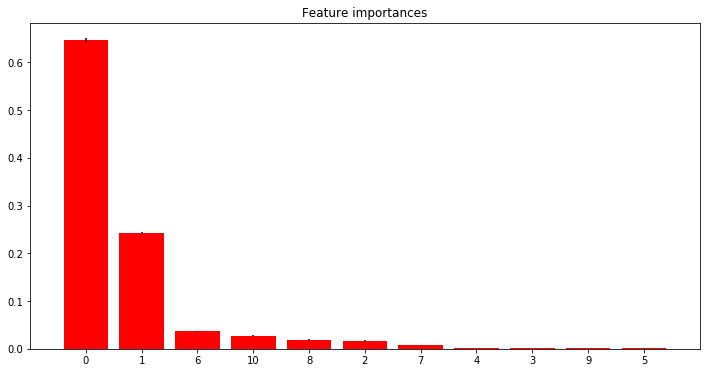

In [23]:
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]
# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

print(X_train.columns.values)
# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center",tick_label = X_train.columns.values)
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()